In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

In [37]:
df = pd.read_csv("shampoo.csv")
print(df.head())

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3


In [38]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [39]:
print(df.columns)

Index(['Month', 'Sales'], dtype='object')


In [40]:
import pandas as pd

# Load the CSV
df = pd.read_csv("shampoo.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert Month to datetime (format: '1-01' => January 2001)
df['Month'] = pd.to_datetime(df['Month'], format='%m-%y')

# Set Month as index
df.set_index('Month', inplace=True)

# Preview data
print(df.head())


            Sales
Month            
2001-01-01  266.0
2002-01-01  145.9
2003-01-01  183.1
2004-01-01  119.3
2005-01-01  180.3


In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

In [42]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [43]:
print(scaled_data.shape)

(36, 1)


In [44]:
print(X.shape)

(33, 3, 1)


In [45]:
time_step = 3
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [46]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

C:\Users\punee\anaconda3n\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.fit(X, y, epochs=100, batch_size=4, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1577
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0429 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0265 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 
Epoch 16/100
9/9 ━━━

In [48]:
# Assume time_step = 3 (or your chosen timestep)
# scaled_data is your scaled sales data (numpy array)
# model is your trained GRU model


# Prepare input sequence: last 'time_step' data points, reshaped for model input
input_sequence = scaled_data[-time_step:].reshape(1, time_step, 1)  # shape: (1, time_step, 1)

# Predict the next sales value (scaled)
predicted_scaled = model.predict(input_sequence)

# Inverse transform to original scale
predicted_value = scaler.inverse_transform(predicted_scaled)

print("Predicted next sales value:", predicted_value[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Predicted next sales value: 600.0702


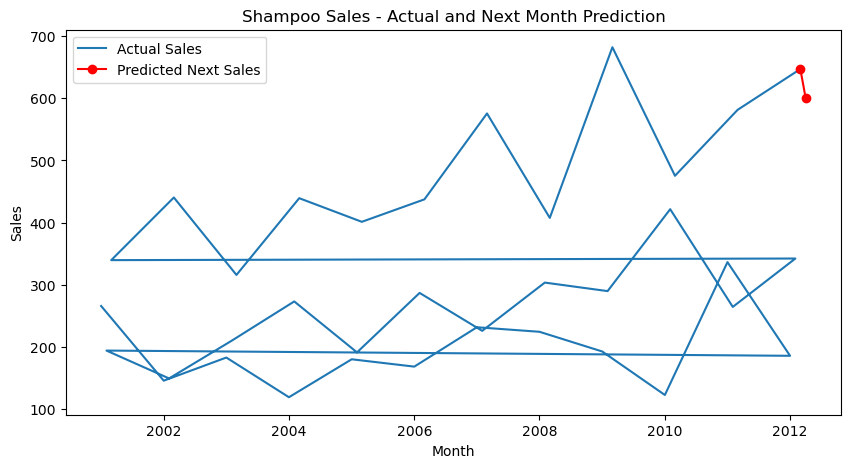

In [50]:

actual_sales = df['Sales'].values
extended_sales = np.append(actual_sales, predicted_value[0][0])

# Extend the datetime index by one month for the prediction point
last_date = df.index[-1]
next_date = last_date + pd.DateOffset(months=1)  # Shampoo dataset is monthly
extended_index = df.index.append(pd.DatetimeIndex([next_date]))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(extended_index[:-1], actual_sales, label='Actual Sales')
plt.plot(extended_index[-2:], extended_sales[-2:], 'ro-', label='Predicted Next Sales')
plt.title("Shampoo Sales - Actual and Next Month Prediction")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()
